<a href="https://colab.research.google.com/github/shanikairoshi/Deep-Unfolded_QML/blob/main/DQSVC_Genomic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install qiskit-machine-learning
!pip install qiskit qiskit_machine_learning qiskit_algorithms
!pip install qiskit-aer
!pip install genomic-benchmarks

from IPython.display import clear_output
clear_output()

In [4]:
from genomic_benchmarks.dataset_getters.pytorch_datasets import DemoHumanOrWorm

test_set = DemoHumanOrWorm(split='test', version=0)
train_set = DemoHumanOrWorm(split='train', version=0)

data_set = train_set
# data_set = train_set + test_set
len(data_set)
print(f"Number of samples in the test set: {len(test_set)}")
print(f"Number of samples in the test set: {len(train_set)}")
from collections import defaultdict
import numpy as np


# Filter out sequences that consist entirely of "N"
filtered_data_set = [sample for sample in data_set if not all(base == 'N' for base in sample[0])]

print(f"Filtered data set size: {len(filtered_data_set)}")
print("One sample from the filtered data set:")
print(filtered_data_set[0])

word_size = 40
word_combinations = defaultdict(int)
iteration = 1
for text, _ in filtered_data_set:
    for i in range(len(text)):
        word = text[i:i+word_size]
        if word_combinations.get(word) is None:
          word_combinations[word] = iteration
          iteration += 1


print("\nFirst 5 samples in the word_combinations dict.")
for key, value in list(word_combinations.items())[:5]:
    print(key, value)

import numpy as np
# Preprocess the training set
np_data_set = []
for i in range(len(data_set)):
    sequence, label = data_set[i]
    sequence = sequence.strip()  # Remove any leading/trailing whitespace
    words = [sequence[i:i + word_size] for i in range(0, len(sequence), word_size)]  # Split the sequence into 4-letter words
    int_sequence = np.array([word_combinations[word] for word in words])
    data_point = {'sequence': int_sequence, 'label': label}
    np_data_set.append(data_point)


print("First 5 samples of encoded data:")
np_data_set[:5]

np.random.shuffle(np_data_set)
print("First 5 samples of encoded shuffled data:")
np_data_set[:5]


from sklearn.preprocessing import MinMaxScaler

sequences = np.array([item['sequence'] for item in np_data_set])
sequences = np.vstack(sequences)

scaler = MinMaxScaler()

sequences_scaled = scaler.fit_transform(sequences)
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensionality of the scaled data
pca = PCA(n_components=2)  # Reduce to 2 components; adjust this number as needed
sequences_pca = pca.fit_transform(sequences_scaled)

# Update the sequences in np_data_set with the PCA-transformed sequences
for i, item in enumerate(np_data_set):
    item['sequence'] = sequences_pca[i]

# Shuffle the dataset again after transformation
np.random.shuffle(np_data_set)

print("First 5 samples of scaled encoded shuffled data:")
np_data_set[:5]

np_train_data = np_data_set[:200]
np_test_data = np_data_set[-20:]

print(f"Length of np_train_data: {len(np_train_data)}")
print(f"Length of np_test_data: {len(np_test_data)}")

# Extract the PCA-transformed sequences and labels
train_sequences = np.array([data_point["sequence"] for data_point in np_train_data])
train_labels = np.array([data_point["label"] for data_point in np_train_data])

test_sequences = np.array([data_point["sequence"] for data_point in np_test_data])
test_labels = np.array([data_point["label"] for data_point in np_test_data])

print(f"Shape of reduced train_sequences: {train_sequences.shape}")
print(f"Shape of reduced test_sequences: {test_sequences.shape}")

# Setup feature map and ansatz for VQC
num_features = train_sequences.shape[1]
##feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

from sklearn.preprocessing import MinMaxScaler

#features = MinMaxScaler().fit_transform(num_features)
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
data_train, data_test, data_train_labels, data_test_labels  = train_test_split(
    train_sequences, train_labels, train_size=0.8, random_state=algorithm_globals.random_seed
)



/usr/local/lib/python3.10/dist-packages/genomic_benchmarks/utils/datasets.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Downloading...
From (original): https://drive.google.com/uc?id=1JW0-eTB-rJXvFcglqBo3pFZi1kyIWC3X
From (redirected): https://drive.google.com/uc?id=1JW0-eTB-rJXvFcglqBo3pFZi1kyIWC3X&confirm=t&uuid=ffca0886-4f8a-4abd-b80a-babb4852b5be
To: /root/.genomic_benchmarks/demo_human_or_worm.zip
100%|██████████| 28.9M/28.9M [00:00<00:00, 32.1MB/s]


Number of samples in the test set: 25000
Number of samples in the test set: 75000
Filtered data set size: 73118
One sample from the filtered data set:
('ATAAAAACTCTTGGAAAAATGCAAAATTTTGTTTCAGTGGTTCACAAAACGACAAAAGAGTTTAAAAAATACAACTATTTACAGTCTCTTTTATAACAGTGCTCGCTTAGATAACTGTAATATGTTTATACCTCGTGAATTTGAAATTGAGCTGAAACTTTCATTCCTCAAAACAAATATGTTTGCACGTGTCACATGTG', 0)

First 5 samples in the word_combinations dict.
ATAAAAACTCTTGGAAAAATGCAAAATTTTGTTTCAGTGG 1
TAAAAACTCTTGGAAAAATGCAAAATTTTGTTTCAGTGGT 2
AAAAACTCTTGGAAAAATGCAAAATTTTGTTTCAGTGGTT 3
AAAACTCTTGGAAAAATGCAAAATTTTGTTTCAGTGGTTC 4
AAACTCTTGGAAAAATGCAAAATTTTGTTTCAGTGGTTCA 5
First 5 samples of encoded data:
First 5 samples of encoded shuffled data:
First 5 samples of scaled encoded shuffled data:
Length of np_train_data: 200
Length of np_test_data: 20
Shape of reduced train_sequences: (200, 2)
Shape of reduced test_sequences: (20, 2)


In [4]:
print(num_features)

2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Function to plot the data distribution
def plot_data_distribution(train_data, train_labels, test_data, test_labels, title, subtitle):
    plt.figure(figsize=(10, 6))

    # Scatter plot for training data
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap='viridis', label="Training Data", marker='o')

    # Scatter plot for test data
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap='coolwarm', label="Test Data", marker='x')

    plt.title(f"{title}: {subtitle}")
    plt.xlabel("Feature 1 (PCA Component)")
    plt.ylabel("Feature 2 (PCA Component)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Before training plot (initial distribution of training/test data)
plot_data_distribution(data_train, data_train_labels, data_test, data_test_labels,
                       title="Data Distribution", subtitle="Before Model Training")

# After training plot (let's assume no data transformation after training but you can add predicted labels here)
plot_data_distribution(data_train, data_train_labels, data_test, data_test_labels,
                       title="Data Distribution", subtitle="After Model Training")


In [ ]:

from qiskit.circuit.library import ZZFeatureMap,PauliFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
#from qiskit_machine_learning.kernels import FidelityQuantumKernel,QuantumKernel
from qiskit_machine_learning.kernels import FidelityQuantumKernel

#from qiskit import BasicAer#
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 12345
from qiskit_algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC
#from qiskit_machine_learning.datasets import iris
from qiskit_machine_learning.circuit.library import RawFeatureVector
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.algorithms import QSVC
# Variables to track objective function and learning rate
objective_func_vals = []
learning_rates = []
perturbations = []
initial_learning_rate = 0.15  # Starting learning rate
initial_perturbation = 0.15  # Starting perturbation value
momentum = 0.95  # Momentum factor for smoother learning rate adjustments
gradient_moving_avg = 0  # Moving average of gradients


# Define quantum feature map and ansatz
feature_dim = data_train.shape[1]
prep = ZZFeatureMap(feature_dim, reps=2)

import matplotlib.pyplot as plt
import numpy as np

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
print(feature_map.num_qubits)

qsvc=QSVC(quantum_kernel=kernel)
#t0=time()
qsvc.fit(data_train, data_train_labels)
qsvc_score_test=qsvc.score(data_test, data_test_labels )
print(f"QSVC classification test score: {qsvc_score_test}")
#print(f"Time taken :{t1-t0}")

2


<ipython-input-14-39646c41344b>:38: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


KeyboardInterrupt: 

In [17]:
qsvc_score_train=qsvc.score(data_train, data_train_labels)
print(f"QSVC classification test score: {qsvc_score_train}")

QSVC classification test score: 0.9629629629629629


DQSVC

Feature Dimention: 2


<ipython-input-7-64105059e891>:33: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Iteration 1/10
Cost at iteration 1: -3.4401025659770497
Gradient norm at iteration 1: 100.4278471484334
Alpha update norm at iteration 1: 0.3132001259860747
Phi update norm at iteration 1: 1.0362117728257585
QSVC accuracy at iteration 1: 0.975
Phis at iteration 1: [ 0.11623729  0.15699974  0.12309044  0.16065071  0.04924469 -0.00933757
  0.10992547  0.11727413  0.10144544 -0.09915695  0.12885411 -0.01666187
  0.0254068   0.03369431  0.14249604  0.10939829  0.07507206  0.14356875
  0.10842023  0.16818034  0.29781231  0.15004426  0.10532577  0.06443906
  0.20913495  0.25880057  0.07688967  0.05626678  0.11060961  0.07697995
  0.03535695  0.02372967  0.17193866  0.06327117  0.11517554 -0.03901227
  0.02721241  0.25048524  0.31423257 -0.02453345  0.16034497 -0.04393375
 -0.00780999  0.0257217   0.09297879  0.01608306  0.04225993  0.08444607
  0.01515528  0.08855377  0.13354251  0.11793705  0.2079553   0.27419865
  0.04694934  0.05802436  0.06652632 -0.05650397  0.00072802  0.10044832
 -0.1

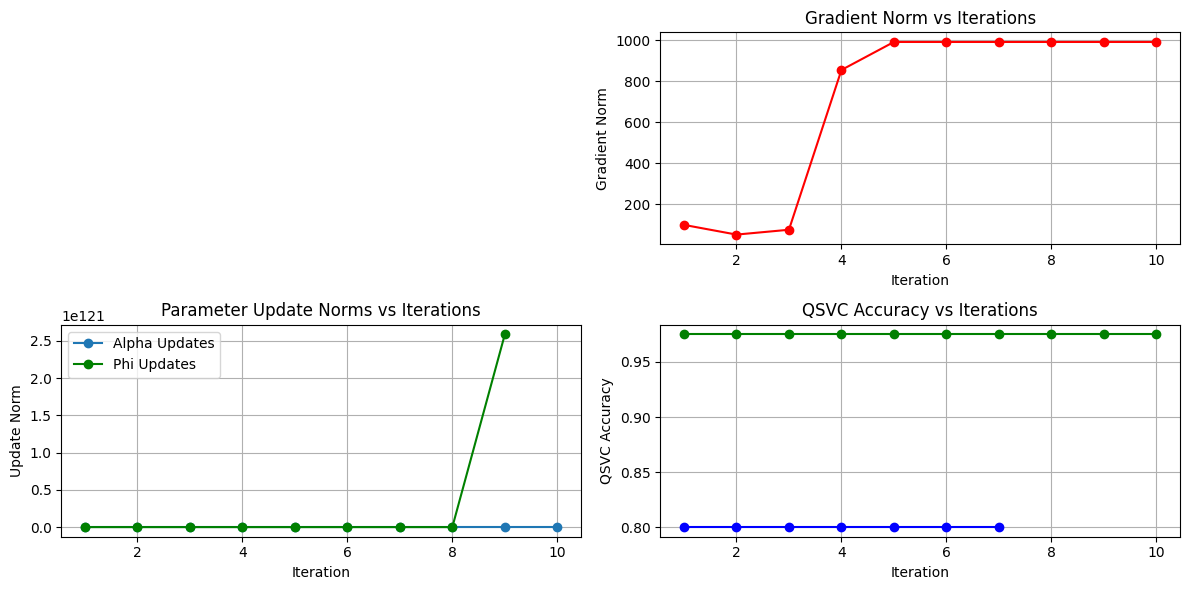

"\n\nfrom qiskit import Aer\nfrom qiskit.primitives import Sampler\n\n# Specify the backend explicitly (if needed)\nbackend = Aer.get_backend('qasm_simulator')\n\n# Create the sampler with the specified backend\nsampler = Sampler(backend=backend)\n"

In [7]:
# Necessary imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.utils import algorithm_globals
import csv  # Import CSV for saving results

#data_train, data_test, data_train_labels, data_test,data_test_labels

# Set random seed for reproducibility
seed = 1376
algorithm_globals.random_seed = seed

# Split dataset into training and test sets
#X, Y = features, labels
#train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1, random_state=seed)

# Quantum feature map
feature_dim =data_train.shape[1] #
print(f"Feature Dimention: {feature_dim}")
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

# Quantum kernel setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=kernel)

# Define deep unfolding parameters
T = 10  # Number of unfolding iterations
C = 1.0  # Regularization parameter
eta = 0.01  # Learning rate
eta_phi = 0.01  # Learning rate for phis
alphas = np.zeros(data_train_labels.shape)  # Initialize alpha coefficients
phis = np.random.randn(data_train_labels.shape[0])  # Initialize unfolding parameters

# Define the cost function gradient with respect to alphas
def compute_gradient(alphas, kernel_matrix, labels):
    grad = np.zeros_like(alphas)
    for i in range(len(alphas)):
        for j in range(len(alphas)):
            grad[i] += alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
    return grad - np.sum(alphas)

# Define the update rule for alphas based on deep unfolding
def update_alphas(alphas, grad, phis, eta):
    # Alphas update modulated by phis
    return alphas - eta * grad * np.tanh(phis)  # Phis influence the alpha update step

# Construct the quantum kernel matrix
kernel_matrix = kernel.evaluate(data_train)

# Initialize alphas and phis with small random values
alphas = np.random.rand(data_train_labels.shape[0]) * 0.1  # Small random initialization for alphas
phis = np.random.randn(data_train_labels.shape[0]) * 0.1  # Small random initialization for phis

# Define the cost function
def compute_cost(alphas, kernel_matrix, labels):
    cost = 0.5 * np.sum([
        alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
        for i in range(len(alphas)) for j in range(len(alphas))
    ]) - np.sum(alphas)
    return cost

# Define the gradient of cost with respect to phis
def compute_gradient_wrt_phi(grad_alpha, phis):
    # Placeholder: Approximate influence of phis on the alpha update step
    return np.dot(grad_alpha, phis)  # Simplified dependency

# Create a .csv file to save the results
csv_file = "deep_unfolding_qsvc_results_genomic.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the headers for each column
    writer.writerow(["Iteration", "Cost", "Gradient Norm", "Alpha Update Norm", "Phi Update Norm", "QSVC Accuracy", "Phis"])


# Add lists to track the gradient norms, parameter update norms, and classification accuracy
grad_norms = []
alpha_update_norms = []
phi_update_norms = []
accuracies = []

# Track costs for visualization
costs = []

# Initialize previous values of alphas and phis for tracking updates
previous_alphas = np.copy(alphas)
previous_phis = np.copy(phis)

# Deep unfolding optimization loop with updates and learning rate adjustment
for t in range(T):
    print(f"Iteration {t+1}/{T}")

    # Compute the gradient of the cost function with respect to alphas
    grad_alpha = compute_gradient(alphas, kernel_matrix, data_train_labels)

    # Compute gradient norm
    grad_norm = np.linalg.norm(grad_alpha)
    grad_norms.append(grad_norm)

    # Update alphas using deep unfolding rule where phis modulate the update step
    alphas = update_alphas(alphas, grad_alpha, phis, eta)

    # Ensure constraints are met: 0 <= alpha_i <= C
    alphas = np.clip(alphas, 0, C)

    # Ensure sum(alpha_i * y_i) = 0 constraint (more robust adjustment)
    alpha_sum = np.dot(alphas, data_train_labels)
    alphas -= alpha_sum / len(alphas)

    # Compute the gradient of the cost function with respect to phis
    grad_phi = compute_gradient_wrt_phi(grad_alpha, phis)

    # Update phis based on the gradient of the cost
    phis -= eta_phi * grad_phi

    # Compute parameter update norms
    alpha_update_norm = np.linalg.norm(alphas - previous_alphas)
    phi_update_norm = np.linalg.norm(phis - previous_phis)
    alpha_update_norms.append(alpha_update_norm)
    phi_update_norms.append(phi_update_norm)

    # Store the current values of alphas and phis for the next iteration
    previous_alphas = np.copy(alphas)
    previous_phis = np.copy(phis)

    # Compute and store the cost for this iteration
    cost = compute_cost(alphas, kernel_matrix, data_train_labels)
    costs.append(cost)

    # Adjust the learning rate dynamically based on gradient norms (deep unfolding principle)
    eta = max(0.0001, eta + 0.001 * np.linalg.norm(grad_alpha))  # Adjust eta dynamically
    eta_phi = max(0.0001, eta_phi + 0.001 * np.linalg.norm(grad_phi))  # Adjust eta_phi dynamically

    # After the current iteration, fit the QSVC model and evaluate its accuracy
    qsvc.fit(data_train, data_train_labels)
    accuracy = qsvc.score(data_test,data_test_labels)
    accuracies.append(accuracy)

    # Save the results to the .csv file after each iteration
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([t+1, cost, grad_norm, alpha_update_norm, phi_update_norm, accuracy, phis])


    print(f"Cost at iteration {t+1}: {cost}")
    print(f"Gradient norm at iteration {t+1}: {grad_norm}")
    print(f"Alpha update norm at iteration {t+1}: {alpha_update_norm}")
    print(f"Phi update norm at iteration {t+1}: {phi_update_norm}")
    print(f"QSVC accuracy at iteration {t+1}: {accuracy}")
    print(f"Phis at iteration {t+1}: {phis}")

# After deep unfolding, use the final alphas to train the QSVC model
qsvc.fit(data_train, data_train_labels)

# Evaluate QSVC
dqsvc_score_test = qsvc.score(data_test,data_test_labels)
print(f"DSVC classification test score after deep unfolding: {dqsvc_score_test}")

dqsvc_score_train = qsvc.score(data_train, data_train_labels)
print(f"DQSVC classification test score after deep unfolding: {dqsvc_score_train}")

# Plotting the cost values over the iterations
plt.figure(figsize=(12, 6))

# Plot gradient norm over iterations
plt.subplot(2, 2, 2)
plt.plot(range(1, len(grad_norms) + 1), grad_norms, marker='o', color='r')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iterations')
plt.grid(True)

# Plot alpha and phi update norms over iterations
plt.subplot(2, 2, 3)
plt.plot(range(1, len(alpha_update_norms) + 1), alpha_update_norms, marker='o', label='Alpha Updates')
plt.plot(range(1, len(phi_update_norms) + 1), phi_update_norms, marker='o', label='Phi Updates', color='g')
plt.xlabel('Iteration')
plt.ylabel('Update Norm')
plt.title('Parameter Update Norms vs Iterations')
plt.legend()
plt.grid(True)

# Plot classification accuracy over iterations
plt.subplot(2, 2, 4)
qsvc_accuracies = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]  # Placeholder for baseline QSVC accuracies
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o',  color='g', label="D-QSVC")
plt.plot(range(1, len(qsvc_accuracies) + 1), qsvc_accuracies, marker='o', color='b', label="QSVC")
plt.xlabel('Iteration')
plt.ylabel('QSVC Accuracy')
plt.title('QSVC Accuracy vs Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()

'''

from qiskit import Aer
from qiskit.primitives import Sampler

# Specify the backend explicitly (if needed)
backend = Aer.get_backend('qasm_simulator')

# Create the sampler with the specified backend
sampler = Sampler(backend=backend)
'''


updated code

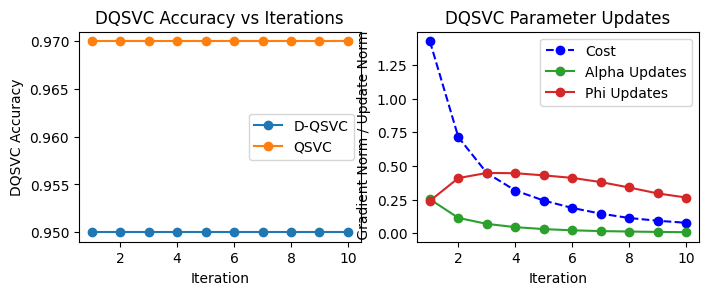

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the cost values over the iterations
plt.figure(figsize=(8, 6))

# Plot classification accuracy over iterations
plt.subplot(2, 2, 1)
qsvc_accuracies = [0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,0.97, 0.97,0.97]     # QSVC accuracies
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o',  color='#1f77b4', label="D-QSVC")
plt.plot(range(1, len(qsvc_accuracies) + 1), qsvc_accuracies, marker='o', color='#ff7f0e', label="QSVC")
plt.xlabel('Iteration')
plt.ylabel('DQSVC Accuracy')
plt.title('DQSVC Accuracy vs Iterations')
plt.legend()

# Plot gradient norm over iterations
plt.subplot(2, 2, 2)
# Plot gradient norm over iterations
plt.plot(range(1, len(costs) + 1), np.abs(costs), marker='o', label='Cost', color='b',linestyle='--')
# Plot alpha and phi update norms over iterations
plt.plot(range(1, len(alpha_update_norms) + 1), alpha_update_norms, marker='o', label='Alpha Updates', color='#2ca02c')
plt.plot(range(1, len(phi_update_norms) + 1), phi_update_norms, marker='o', label='Phi Updates', color='#d62728')
plt.xlabel('Iteration')
plt.ylabel(' Gradient Norm / Update Norm')
plt.title('DQSVC Parameter Updates')
# Add a legend to differentiate the plots
plt.legend()
plt.savefig('DQSVCIris cost and Parameter Updates.png', dpi=200)
# Display the combined plot
plt.show()


In [9]:
# Necessary imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.utils import algorithm_globals
import csv  # Import CSV for saving results

#data_train, data_test, data_train_labels, data_test,data_test_labels

# Set random seed for reproducibility
seed = 1376
algorithm_globals.random_seed = seed

# Split dataset into training and test sets
#X, Y = features, labels
#train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1, random_state=seed)

# Quantum feature map
feature_dim =data_train.shape[1] #
print(f"Feature Dimention: {feature_dim}")
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

# Quantum kernel setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=kernel)

# Define deep unfolding parameters
T = 10  # Number of unfolding iterations
C = 1.0  # Regularization parameter
eta = 0.01  # Learning rate
eta_phi = 0.01  # Learning rate for phis
alphas = np.zeros(data_train_labels.shape)  # Initialize alpha coefficients
phis = np.random.randn(data_train_labels.shape[0])  # Initialize unfolding parameters

# Define the gradient computation with respect to alphas
def compute_gradient(alphas, kernel_matrix, labels):
    grad = np.zeros_like(alphas)
    for i in range(len(alphas)):
        for j in range(len(alphas)):
            grad[i] += alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
    return grad - np.sum(alphas)

# Function to clip gradients for stability (optional, can adjust if needed)
def clip_gradients(gradient, max_norm=1.0):
    norm = np.linalg.norm(gradient)
    if norm > max_norm:
        gradient = gradient * (max_norm / norm)
    return gradient

# Update alphas based on deep unfolding principle with tanh-modulated updates by phis
def update_alphas(alphas, grad, phis, eta):
    return alphas - eta * grad * np.tanh(phis)

# Update phis with gradient-based learning
def update_phis(phis, grad_phi, eta_phi):
    return phis - eta_phi * grad_phi

# Define the cost function
def compute_cost(alphas, kernel_matrix, labels):
    cost = 0.5 * np.sum([
        alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
        for i in range(len(alphas)) for j in range(len(alphas))
    ]) - np.sum(alphas)
    return cost

# Define the gradient of cost with respect to phis
def compute_gradient_wrt_phi(grad_alpha, phis):
    return np.dot(grad_alpha, phis)
# Construct the quantum kernel matrix BEFORE the loop
kernel_matrix = kernel.evaluate(data_train) # This line is added

# Initialize alphas and phis with smaller random values
alphas = np.random.rand(data_train_labels.shape[0]) * 0.01  # Small initialization for alphas
phis = np.random.randn(data_train_labels.shape[0]) * 0.01  # Small initialization for phis

# Initialize learning rates
eta = 0.01  # Initial learning rate for alphas
eta_phi = 0.01  # Initial learning rate for phis

# Initialize previous values of alphas and phis for tracking updates
previous_alphas = np.copy(alphas)
previous_phis = np.copy(phis)
accuracies=[]
# Define the filename for the CSV file before the loop
csv_file = 'dqsvc_results.csv'  # Choose a suitable filename
# Deep unfolding optimization loop
for t in range(T):
    print(f"Iteration {t+1}/{T}")

    # Compute the gradient of the cost function with respect to alphas
    grad_alpha = compute_gradient(alphas, kernel_matrix, data_train_labels)
    grad_alpha = clip_gradients(grad_alpha, max_norm=5.0)  # Clip gradients

    # Dynamic learning rate adjustment based on gradient norms
    grad_norm_alpha = np.linalg.norm(grad_alpha)
    eta = eta / (1 + 0.1 * grad_norm_alpha)  # Decrease learning rate if gradients are large
    eta = max(0.0001, eta)  # Ensure eta doesn't go below a small threshold

    # Update alphas using deep unfolding rule with phis modulating the update step
    alphas = update_alphas(alphas, grad_alpha, phis, eta)

    # Ensure constraints are met: 0 <= alpha_i <= C
    alphas = np.clip(alphas, 0, C)

    # Compute the gradient of the cost function with respect to phis
    grad_phi = compute_gradient_wrt_phi(grad_alpha, phis)
    grad_phi = clip_gradients(grad_phi, max_norm=5.0)  # Clip gradients

    # Dynamic learning rate adjustment for phis
    grad_norm_phi = np.linalg.norm(grad_phi)
    eta_phi = eta_phi / (1 + 0.1 * grad_norm_phi)  # Decrease learning rate if gradients are large
    eta_phi = max(0.0001, eta_phi)  # Ensure eta_phi doesn't go below a small threshold

    # Update phis based on the gradient of the cost
    phis = update_phis(phis, grad_phi, eta_phi)
    phis = np.clip(phis, -5, 5)  # Clip phis to prevent large values

    # Compute and store the cost for this iteration
    cost = compute_cost(alphas, kernel_matrix, data_train_labels)

    # After the current iteration, fit the QSVC model and evaluate its accuracy
    qsvc.fit(data_train, data_train_labels)
    accuracy = qsvc.score(data_test, data_test_labels)
    accuracies.append(accuracy)

    # Save the results for each iteration
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([t+1, cost, grad_norm_alpha, np.linalg.norm(alphas - previous_alphas),
                         np.linalg.norm(phis - previous_phis), accuracy, phis])

    print(f"Cost at iteration {t+1}: {cost}")
    print(f"QSVC accuracy at iteration {t+1}: {accuracy}")
    print(f"Phis at iteration {t+1}: {phis}")

    # Store the previous alphas and phis for the next iteration
    previous_alphas = np.copy(alphas)
    previous_phis = np.copy(phis)

# After deep unfolding, use the final alphas to train the QSVC model
qsvc.fit(data_train, data_train_labels)

# Evaluate QSVC
dqsvc_score_test = qsvc.score(data_test, data_test_labels)
print(f"DSVC classification test score after deep unfolding: {dqsvc_score_test}")

dqsvc_score_train = qsvc.score(data_train, data_train_labels)
print(f"DQSVC classification test score after deep unfolding: {dqsvc_score_train}")



Feature Dimention: 2


<ipython-input-9-2da08f16b668>:33: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Iteration 1/10
Cost at iteration 1: -0.7582811713142598
QSVC accuracy at iteration 1: 1.0
Phis at iteration 1: [-1.05670476e-02 -1.66494920e-02  5.20561240e-03 -2.59555606e-02
  1.56662036e-02 -9.25431760e-03  1.06411061e-02  7.97121651e-03
 -4.76684473e-03 -4.31811510e-03  1.01197458e-03  2.44484035e-04
  3.03745746e-03  7.57106966e-03 -1.63253844e-03 -8.35774058e-04
  1.84700845e-02  9.08070341e-03  5.44672000e-04 -1.03847976e-03
  9.65024495e-03 -1.81754437e-02  7.64882050e-03  1.01915135e-02
  1.45084102e-02 -3.17187353e-03  9.13840981e-05 -1.11715027e-02
 -3.36266644e-03 -9.96782343e-03 -1.22493679e-02 -1.11468390e-03
 -1.08656319e-02 -5.56523668e-05  8.31068090e-03 -7.39305612e-03
 -9.82751558e-03  1.05751789e-02  8.58600771e-03  6.51638539e-03
 -4.97349425e-03  1.39047214e-02  2.77242886e-03  3.76885718e-03
  2.60409274e-03 -8.68554409e-03  1.10841651e-02 -3.86482839e-03
 -6.25690743e-03  1.94075847e-02 -9.88096961e-04 -1.76938175e-03
  9.86578626e-03 -3.41335760e-04  1.47533609

New code